In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import re

In [2]:
# Load the dataset
data = pd.read_json('News_Category_Dataset_v3.json', lines=True)

In [3]:
data = data[['headline', 'short_description', 'category']]

In [4]:
data.head()

,headline,short_description,category
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,U.S. NEWS


In [5]:
# Combine headline and short_description for richer features
data['text'] = data['headline'] + " " + data['short_description']

In [9]:
# Preprocess text
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

In [10]:
data['text'] = data['text'].apply(preprocess_text)

In [11]:
# Encode labels
label_encoder = LabelEncoder()
data['category'] = label_encoder.fit_transform(data['category'])


In [12]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['category'], test_size=0.2, random_state=42) #startify=y

In [13]:
# Apply TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

In [14]:
# Build a dense neural network
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.InputLayer(input_shape=(X_train_tfidf.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

C:\Users\71518\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [15]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [16]:
# Train the model and capture the history
history = model.fit(
    X_train_tfidf,  # Training data
    y_train,        # Training labels
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=20,            # Number of epochs
    batch_size=32        # Batch size
)

Epoch 1/20
4191/4191 ━━━━━━━━━━━━━━━━━━━━ 130s 29ms/step - accuracy: 0.3822 - loss: 2.4673 - val_accuracy: 0.5655 - val_loss: 1.5882
Epoch 2/20
4191/4191 ━━━━━━━━━━━━━━━━━━━━ 130s 31ms/step - accuracy: 0.5798 - loss: 1.5491 - val_accuracy: 0.5797 - val_loss: 1.5180
Epoch 3/20
4191/4191 ━━━━━━━━━━━━━━━━━━━━ 125s 30ms/step - accuracy: 0.6238 - loss: 1.3349 - val_accuracy: 0.5869 - val_loss: 1.5051
Epoch 4/20
4191/4191 ━━━━━━━━━━━━━━━━━━━━ 111s 27ms/step - accuracy: 0.6563 - loss: 1.1914 - val_accuracy: 0.5877 - val_loss: 1.5197
Epoch 5/20
4191/4191 ━━━━━━━━━━━━━━━━━━━━ 111s 26ms/step - accuracy: 0.6889 - loss: 1.0693 - val_accuracy: 0.5872 - val_loss: 1.5618
Epoch 6/20
4191/4191 ━━━━━━━━━━━━━━━━━━━━ 115s 27ms/step - accuracy: 0.7125 - loss: 0.9663 - val_accuracy: 0.5863 - val_loss: 1.6074
Epoch 7/20
4191/4191 ━━━━━━━━━━━━━━━━━━━━ 109s 26ms/step - accuracy: 0.7337 - loss: 0.8808 - val_accuracy: 0.5854 - val_loss: 1.6642
Epoch 8/20
4191/4191 ━━━━━━━━━━━━━━━━━━━━ 113s 27ms/step - accuracy: 

In [19]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_tfidf, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


1310/1310 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5710 - loss: 2.5784
Test Accuracy: 0.57


In [21]:
loss

2.561328411102295

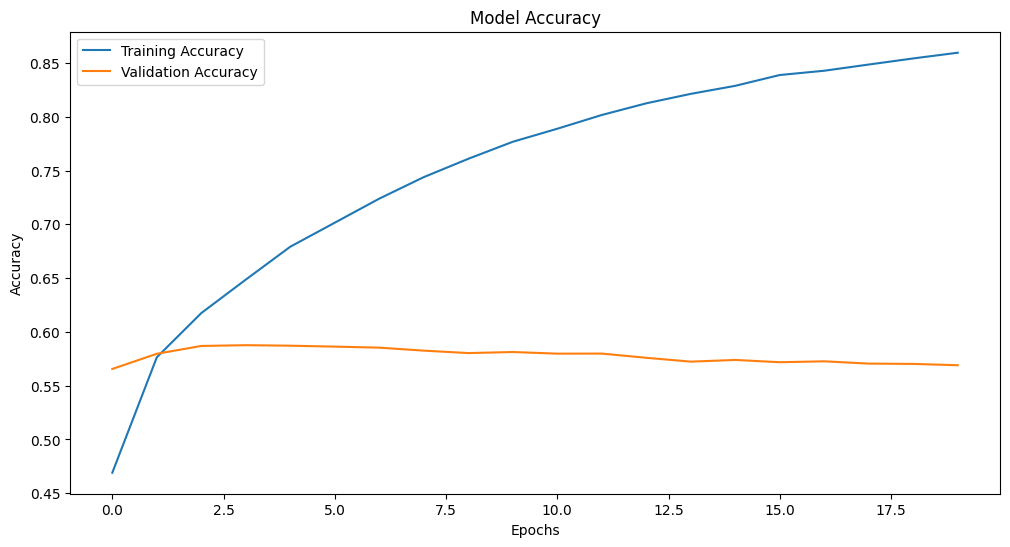

In [17]:
import matplotlib.pyplot as plt

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

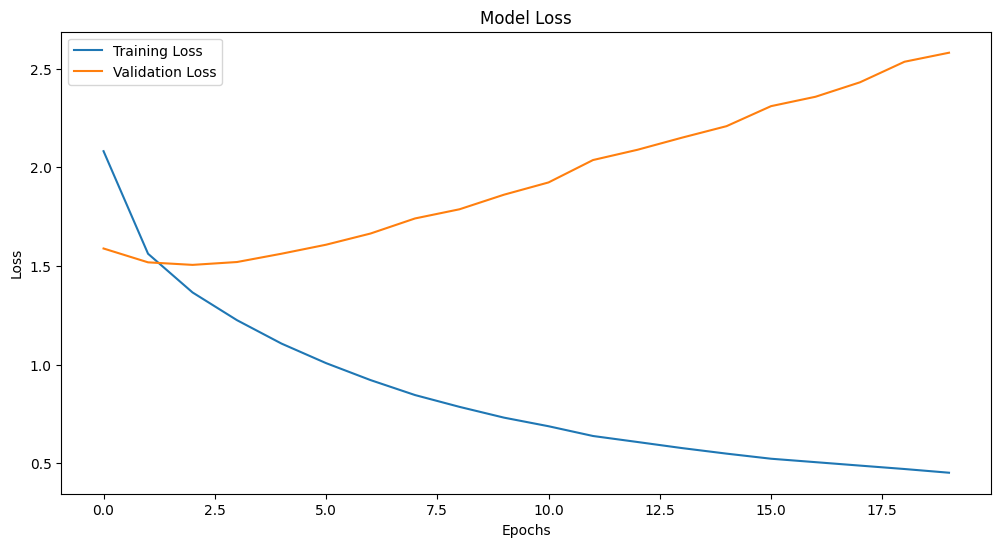

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()